In [5]:
# Import libraries

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [6]:
# Import Data
X_train= pd.read_csv('/Users/cuicuisong/Desktop/data/train_all_feature.csv',  index_col=0)
X_test= pd.read_csv('/Users/cuicuisong/Desktop/data/test_all_feature.csv',  index_col=0)
y_train= pd.read_csv('/Users/cuicuisong/Desktop/data/y_train_new.csv')
y_test= pd.read_csv('/Users/cuicuisong/Desktop/data/y_test_new.csv')


In [4]:
X_train.head()

,DeductibleAmtPaid_mean,DeductibleAmtPaid_max,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,OPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_max,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_mean,OPAnnualDeductibleAmt_max,OPAnnualDeductibleAmt_sum,...,totalProcCode_3722,totalProcCode_8151,totalProcCode_8872,totalProcCode_9671,totalProcCode_4513,totalProcCode_5849,totalProcCode_9390,totalProcCode_Other,TotalTeDiagCode,TotalTeProcCode
Provider,,,,,,,,,,,,,,,,,,,,,
PRV51001,213.600000,1068.0,12.000000,12.000000,2615.200000,13460,65380,463.920000,2700,11598,...,0,0,0,0,0,0,0,125,1.166158,1.186518
PRV51004,2.080537,100.0,11.865772,11.959732,2194.899329,20900,327040,622.751678,7410,92790,...,0,0,0,0,0,0,0,745,1.144495,1.161067
PRV51005,3.175966,200.0,11.907296,11.939914,2109.733906,97510,2457840,636.328755,6330,741323,...,0,0,0,0,0,0,0,5825,1.174065,1.161067
PRV51008,53.860465,1068.0,12.000000,12.000000,2570.465116,20500,110530,616.046512,4140,26490,...,0,0,0,0,0,0,0,215,1.144524,1.163394
PRV51011,23.586207,1068.0,12.000000,12.000000,1399.310345,6340,81160,366.724138,1070,21270,...,0,0,0,0,0,0,0,290,1.141459,1.161067


In [7]:
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4328, 104)

(1082, 104)

(4328, 1)

(1082, 1)

In [8]:
# fill NA as 0, X_test has two null values
X_test.fillna(0,inplace=True)

In [9]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,roc_auc_score
from sklearn.decomposition import PCA

#### II. Avoid overfitting: early stopping ––––  Does not work

In [54]:
model = XGBClassifier()
eval_set = [(X_train, y_train)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred_train = model.predict(X_train)
predictions_train = [round(value) for value in y_pred_train]
# evaluate predictions
accuracy = accuracy_score(y_train, predictions_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.46265
[1]	validation_0-logloss:0.33103
[2]	validation_0-logloss:0.24630
[3]	validation_0-logloss:0.18674
[4]	validation_0-logloss:0.14701
[5]	validation_0-logloss:0.11542
[6]	validation_0-logloss:0.09120
[7]	validation_0-logloss:0.07442
[8]	validation_0-logloss:0.06064
[9]	validation_0-logloss:0.05113
[10]	validation_0-logloss:0.04440
[11]	validation_0-logloss:0.03862
[12]	validation_0-logloss:0.03317
[13]	validation_0-logloss:0.02811
[14]	validation_0-logloss:0.02485
[15]	validation_0-logloss:0.02310
[16]	validation_0-logloss:0.02129
[17]	validation_0-logloss:0.01915
[18]	validation_0-logloss:0.01736
[19]	validation_0-logloss:0.01563
[20]	validation_0-logloss:0.01387
[21]	validation_0-logloss:0.01269
[22]	validation_0-logloss:0.01168
[23]	validation_0-logloss:0.01073
[24]	validation_0-logloss:0.00980
[25]	validation_0-logloss:0.00927
[26]	validation_0-logloss:0.00862
[27]	validation_0-logloss:0.00810
[28]	validation_0-logloss:0.00756
[29]	validation_0-loglos

In [50]:
#fit model on training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


[0]	validation_0-logloss:0.49148
[1]	validation_0-logloss:0.38613
[2]	validation_0-logloss:0.32535
[3]	validation_0-logloss:0.28964
[4]	validation_0-logloss:0.27331
[5]	validation_0-logloss:0.26678
[6]	validation_0-logloss:0.26859
[7]	validation_0-logloss:0.27632
[8]	validation_0-logloss:0.28495
[9]	validation_0-logloss:0.29470
[10]	validation_0-logloss:0.30295
[11]	validation_0-logloss:0.31591
[12]	validation_0-logloss:0.33000
[13]	validation_0-logloss:0.34989
[14]	validation_0-logloss:0.36701
Accuracy: 91.40%


In [48]:
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)
# make predictions for train data
y_train_pred = model.predict(X_train)
predictions_train = [round(val) for val in y_train_pred]

# make predictions for test data
y_test_pred = model.predict(X_test)
predictions_test = [round(value) for value in y_test_pred]


[0]	validation_0-error:0.08410
[1]	validation_0-error:0.08872
[2]	validation_0-error:0.08688
[3]	validation_0-error:0.08688
[4]	validation_0-error:0.08318
[5]	validation_0-error:0.08595
[6]	validation_0-error:0.08595
[7]	validation_0-error:0.09057
[8]	validation_0-error:0.09057
[9]	validation_0-error:0.09057
[10]	validation_0-error:0.09057
[11]	validation_0-error:0.09057
[12]	validation_0-error:0.09057
[13]	validation_0-error:0.09057
[14]	validation_0-error:0.09057
[15]	validation_0-error:0.09150
[16]	validation_0-error:0.09057
[17]	validation_0-error:0.09150
[18]	validation_0-error:0.09150
[19]	validation_0-error:0.09150
[20]	validation_0-error:0.09150
[21]	validation_0-error:0.09242
[22]	validation_0-error:0.09242
[23]	validation_0-error:0.09242
[24]	validation_0-error:0.09242
[25]	validation_0-error:0.09242
[26]	validation_0-error:0.09242
[27]	validation_0-error:0.09242
[28]	validation_0-error:0.09242
[29]	validation_0-error:0.09242
[30]	validation_0-error:0.09242
[31]	validation_0-

In [49]:
print('Training Accuracy Score: {0:.3f}'.format(accuracy_score(y_train, predictions_train)))
print('Testinging Accuracy Score: {0:.3f}'.format(accuracy_score(y_test, predictions_test)))

Training Accuracy Score: 1.000
Testinging Accuracy Score: 0.908


In [56]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, predictions_train))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, predictions_test))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3925
           1       1.00      1.00      1.00       403

    accuracy                           1.00      4328
   macro avg       1.00      1.00      1.00      4328
weighted avg       1.00      1.00      1.00      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       979
           1       1.00      0.03      0.06       103

    accuracy                           0.91      1082
   macro avg       0.95      0.51      0.50      1082
weighted avg       0.92      0.91      0.87      1082



#### I. Baseline Model

In [10]:
xgb_model = XGBClassifier()

In [57]:
xgb_steps = [('rescale', StandardScaler()), 
            ('xgbc', XGBClassifier())]
xgb_model = Pipeline(xgb_steps)
xgb_model = xgb_model.fit(X_train,y_train)   #criterion = 'gini'

In [58]:
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

#### Metrics

In [59]:
print('Training Accuracy Score: {0:.3f}'.format(accuracy_score(y_train, y_train_pred)))
print('Testinging Accuracy Score: {0:.3f}'.format(accuracy_score(y_test, y_test_pred)))

Training Accuracy Score: 1.000
Testinging Accuracy Score: 0.908


In [60]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, y_train_pred))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, y_test_pred))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3925
           1       1.00      1.00      1.00       403

    accuracy                           1.00      4328
   macro avg       1.00      1.00      1.00      4328
weighted avg       1.00      1.00      1.00      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       979
           1       1.00      0.03      0.06       103

    accuracy                           0.91      1082
   macro avg       0.95      0.51      0.50      1082
weighted avg       0.92      0.91      0.87      1082



In [61]:
y_train_proba = xgb_model.predict_proba(X_train)
y_test_proba = xgb_model.predict_proba(X_test)

In [62]:
roc_auc_score_train = roc_auc_score(y_train, xgb_model.predict_proba(X_train)[:, 1])  
roc_auc_score_test = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print('roc_auc_score for the train dataset: {:.2f}'.format(roc_auc_score_train))
print('roc_auc_score for the test dataset: {:.2f}'.format(roc_auc_score_test))

roc_auc_score for the train dataset: 1.00
roc_auc_score for the test dataset: 0.81


Text(0.5, 1.0, 'Test ROC Curve')

<Figure size 432x288 with 0 Axes>

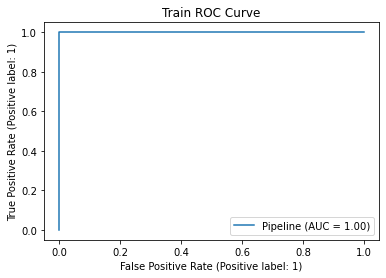

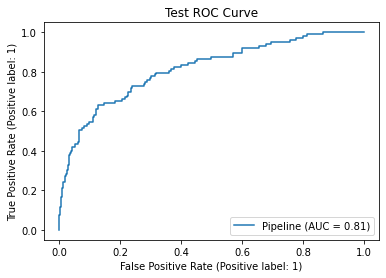

In [16]:
from sklearn.metrics import plot_roc_curve 

plt.figure(1).clf()

plot_roc_curve(xgb_model, X_train, y_train)

plt.title('Train ROC Curve')

plot_roc_curve(xgb_model, X_test, y_test)
plt.title('Test ROC Curve')

In [112]:
# from sklearn.metrics import roc_curve,auc,RocCurveDisplay
#y_train_proba=xgb_model.predict_proba(X_train)
#fpr, tpr, thresholds = roc_curve(y_train, y_train_proba[:,1])
#roc_auc = auc(fpr, tpr)
#display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 # estimator_name='xgb regr')
#display.plot()

#plt.title('train ROC Curve')
#plt.show()

In [63]:
y_train_score = y_train_proba[:, 1]
y_test_score = y_test_proba[:, 1]

PR-AUC is 1.00


Text(0.5, 1.0, 'Precision-Recall Curve of Train')

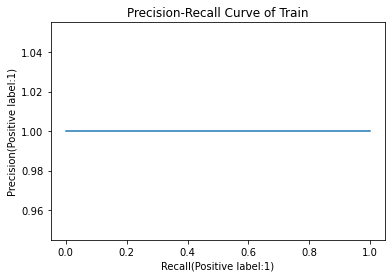

In [64]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc,plot_precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

# Data to plot precision - recall curve
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_train_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltrain = auc(recall_train, precision_train)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltrain))

# plot PR curve
plt.plot(recall_train, precision_train)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Train')

PR-AUC is 0.45


Text(0.5, 1.0, 'Precision-Recall Curve of Test')

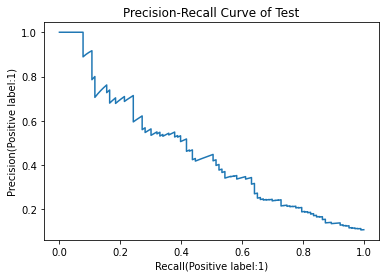

In [65]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print('PR-AUC is {:.2f}'.format(auc_precision_recall))

# plot PR curve
plt.plot(recall, precision)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test')

#### Feature Importance

In [66]:
from xgboost import plot_importance
from sklearn.feature_selection import SelectFwe, chi2

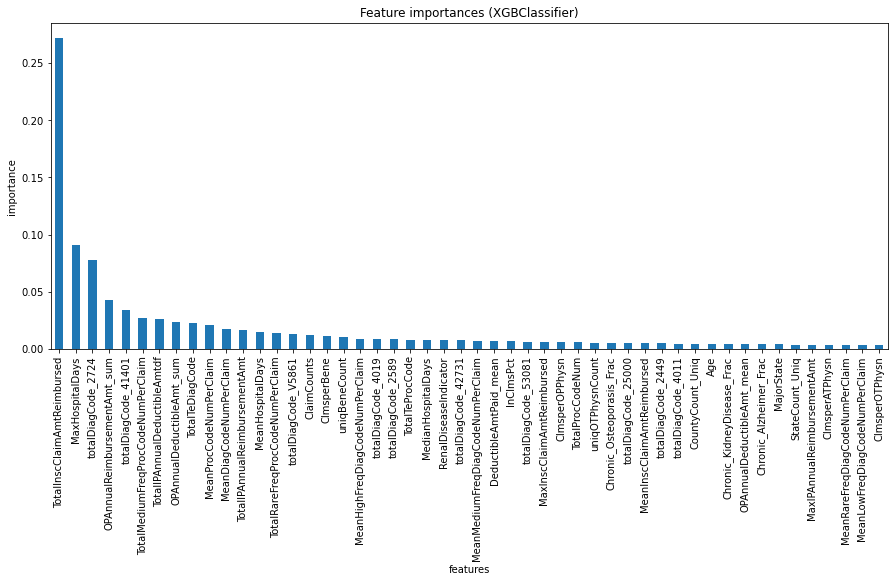

In [67]:
xgb_importances=xgb_model[1].feature_importances_
#xgb_feature_names=xgb_model.feature_names_in_
xgb_feature_names = X_train.columns
forest_importances = (pd.Series(xgb_importances, index=xgb_feature_names)).sort_values(ascending=False)

fig = plt.figure(figsize=(15,6))
forest_importances[:50].plot.bar()
plt.title("Feature importances (XGBClassifier)")
plt.ylabel("importance")
plt.xlabel("features")
plt.show()

In [24]:
xgb_importances[:50].sum()

0.65532464

In [25]:
print(forest_importances.nlargest(30))

TotalInscClaimAmtReimbursed           0.271590
MaxHospitalDays                       0.090997
totalDiagCode_2724                    0.077729
OPAnnualReimbursementAmt_sum          0.043109
totalDiagCode_41401                   0.034422
TotalMediumFreqProcCodeNumPerClaim    0.027166
TotalIPAnnualDeductibleAmtdf          0.025729
OPAnnualDeductibleAmt_sum             0.023557
TotalTeDiagCode                       0.022906
MeanProcCodeNumPerClaim               0.020801
MeanDiagCodeNumPerClaim               0.017797
TotalIPAnnualReimbursementAmt         0.016527
MeanHospitalDays                      0.015172
TotalRareFreqProcCodeNumPerClaim      0.014148
totalDiagCode_V5861                   0.013457
ClaimCounts                           0.011829
ClmsperBene                           0.011488
uniqBeneCount                         0.010588
MeanHighFreqDiagCodeNumPerClaim       0.009090
totalDiagCode_4019                    0.008761
totalDiagCode_2589                    0.008546
TotalTeProcCo

In [26]:
from sklearn.feature_selection import SelectFromModel

##### 1.2 Top 30 features

In [27]:
pipeline1 = Pipeline([
    ('selector', SelectFromModel(estimator=XGBClassifier(), max_features=30, threshold=-np.inf)),
    ('regressor',XGBClassifier())
])

pipeline1.fit(X_train, y_train)

selected_features1 = pipeline1['selector'].get_support()
print(selected_features1.sum())

30


In [28]:
selected_features_names1 = X_train.columns[selected_features1].tolist()
print(selected_features_names1)

['DeductibleAmtPaid_mean', 'OPAnnualReimbursementAmt_sum', 'OPAnnualDeductibleAmt_sum', 'ClaimCounts', 'RenalDiseaseIndicator', 'uniqBeneCount', 'ClmsperBene', 'TotalInscClaimAmtReimbursed', 'MaxInscClaimAmtReimbursed', 'InClmsPct', 'TotalIPAnnualReimbursementAmt', 'TotalIPAnnualDeductibleAmtdf', 'MaxHospitalDays', 'MedianHospitalDays', 'MeanHospitalDays', 'MeanDiagCodeNumPerClaim', 'MeanProcCodeNumPerClaim', 'MeanHighFreqDiagCodeNumPerClaim', 'MeanMediumFreqDiagCodeNumPerClaim', 'TotalMediumFreqProcCodeNumPerClaim', 'TotalRareFreqProcCodeNumPerClaim', 'totalDiagCode_4019', 'totalDiagCode_2724', 'totalDiagCode_42731', 'totalDiagCode_V5861', 'totalDiagCode_53081', 'totalDiagCode_41401', 'totalDiagCode_2589', 'TotalTeDiagCode', 'TotalTeProcCode']


In [30]:
X_train_reduced30 = X_train[['DeductibleAmtPaid_mean', 'OPAnnualReimbursementAmt_sum', 'OPAnnualDeductibleAmt_sum', 'ClaimCounts', 'RenalDiseaseIndicator', 'uniqBeneCount', 'ClmsperBene', 'TotalInscClaimAmtReimbursed', 'MaxInscClaimAmtReimbursed', 'InClmsPct', 'TotalIPAnnualReimbursementAmt', 'TotalIPAnnualDeductibleAmtdf', 'MaxHospitalDays', 'MedianHospitalDays', 'MeanHospitalDays', 'MeanDiagCodeNumPerClaim', 'MeanProcCodeNumPerClaim', 'MeanHighFreqDiagCodeNumPerClaim', 'MeanMediumFreqDiagCodeNumPerClaim', 'TotalMediumFreqProcCodeNumPerClaim', 'TotalRareFreqProcCodeNumPerClaim', 'totalDiagCode_4019', 'totalDiagCode_2724', 'totalDiagCode_42731', 'totalDiagCode_V5861', 'totalDiagCode_53081', 'totalDiagCode_41401', 'totalDiagCode_2589', 'TotalTeDiagCode', 'TotalTeProcCode']]

In [34]:
X_test_reduced30 = X_test[['DeductibleAmtPaid_mean', 'OPAnnualReimbursementAmt_sum', 'OPAnnualDeductibleAmt_sum', 'ClaimCounts', 'RenalDiseaseIndicator', 'uniqBeneCount', 'ClmsperBene', 'TotalInscClaimAmtReimbursed', 'MaxInscClaimAmtReimbursed', 'InClmsPct', 'TotalIPAnnualReimbursementAmt', 'TotalIPAnnualDeductibleAmtdf', 'MaxHospitalDays', 'MedianHospitalDays', 'MeanHospitalDays', 'MeanDiagCodeNumPerClaim', 'MeanProcCodeNumPerClaim', 'MeanHighFreqDiagCodeNumPerClaim', 'MeanMediumFreqDiagCodeNumPerClaim', 'TotalMediumFreqProcCodeNumPerClaim', 'TotalRareFreqProcCodeNumPerClaim', 'totalDiagCode_4019', 'totalDiagCode_2724', 'totalDiagCode_42731', 'totalDiagCode_V5861', 'totalDiagCode_53081', 'totalDiagCode_41401', 'totalDiagCode_2589', 'TotalTeDiagCode', 'TotalTeProcCode']]

In [44]:
xgb_steps_reduced30 = [('rescale', MinMaxScaler()), 
            ('xgbc', XGBClassifier())]
xgb_model_reduced30 = Pipeline(xgb_steps_reduced30)
xgb_model_reduced30 = xgb_model_reduced30.fit(X_train_reduced30,y_train)

In [38]:
y_train_pred_reduced30 = xgb_model_reduced30.predict(X_train_reduced30)
y_test_pred_reduced30 = xgb_model_reduced30.predict(X_test_reduced30)

In [68]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, y_train_pred_reduced30))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, y_test_pred_reduced30))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3925
           1       1.00      1.00      1.00       403

    accuracy                           1.00      4328
   macro avg       1.00      1.00      1.00      4328
weighted avg       1.00      1.00      1.00      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       979
           1       1.00      0.01      0.02       103

    accuracy                           0.91      1082
   macro avg       0.95      0.50      0.48      1082
weighted avg       0.91      0.91      0.86      1082



In [82]:
y_train_proba_reduced30  = xgb_model_reduced30 .predict_proba(X_train_reduced30 )
y_test_proba_reduced30  = xgb_model_reduced30 .predict_proba(X_test_reduced30 )

In [83]:
y_train_score_reduced30 = y_train_proba_reduced30 [:, 1]
y_test_score_reduced30  = y_test_proba_reduced30 [:, 1]

PR-AUC is 0.29


Text(0.5, 1.0, 'Precision-Recall Curve of Test-30 Features')

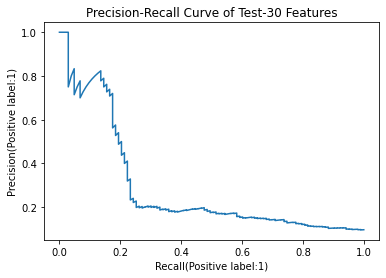

In [99]:
# Data to plot precision - recall curve
precision_reduced30, recall_reduced30, thresholds_reduced30 = precision_recall_curve(y_test, y_test_score_reduced30 )
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall_reduced30  = auc(recall_reduced30 , precision_reduced30 )
print('PR-AUC is {:.2f}'.format(auc_precision_recall_reduced30))

# plot PR curve
plt.plot(recall_reduced30, precision_reduced30)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test-30 Features')

#### 1.3 Selected top 50 features

In [85]:

pipeline = Pipeline([
    ('selector', SelectFromModel(estimator=XGBClassifier(), max_features=50, threshold=-np.inf)),
    ('regressor',XGBClassifier())
])


In [86]:
pipeline.fit(X_train, y_train)

selected_features = pipeline['selector'].get_support()
print(selected_features.sum())

50


In [87]:
selected_features_names = X_train.columns[selected_features].tolist()
print(selected_features_names)

['DeductibleAmtPaid_mean', 'OPAnnualReimbursementAmt_sum', 'OPAnnualDeductibleAmt_mean', 'OPAnnualDeductibleAmt_sum', 'ClaimCounts', 'RenalDiseaseIndicator', 'Age', 'uniqBeneCount', 'ClmsperBene', 'TotalInscClaimAmtReimbursed', 'MeanInscClaimAmtReimbursed', 'MaxInscClaimAmtReimbursed', 'ClmsperATPhysn', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'InClmsPct', 'StateCount_Uniq', 'MajorState', 'CountyCount_Uniq', 'TotalIPAnnualReimbursementAmt', 'MaxIPAnnualReimbursementAmt', 'TotalIPAnnualDeductibleAmtdf', 'MaxHospitalDays', 'MedianHospitalDays', 'MeanHospitalDays', 'Chronic_Alzheimer_Frac', 'Chronic_KidneyDisease_Frac', 'Chronic_Osteoporasis_Frac', 'MeanDiagCodeNumPerClaim', 'MeanProcCodeNumPerClaim', 'TotalProcCodeNum', 'MeanHighFreqDiagCodeNumPerClaim', 'MeanMediumFreqDiagCodeNumPerClaim', 'MeanLowFreqDiagCodeNumPerClaim', 'MeanRareFreqDiagCodeNumPerClaim', 'TotalMediumFreqProcCodeNumPerClaim', 'TotalRareFreqProcCodeNumPerClaim', 'totalDiagCode_4019', 'totalDiagCode_25000

In [88]:
X_train_reduced50=X_train[['DeductibleAmtPaid_mean', 'OPAnnualReimbursementAmt_sum', 'OPAnnualDeductibleAmt_mean', 'OPAnnualDeductibleAmt_sum', 'ClaimCounts', 'RenalDiseaseIndicator', 'Age', 'uniqBeneCount', 'ClmsperBene', 'TotalInscClaimAmtReimbursed', 'MeanInscClaimAmtReimbursed', 'MaxInscClaimAmtReimbursed', 'ClmsperATPhysn', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'InClmsPct', 'StateCount_Uniq', 'MajorState', 'CountyCount_Uniq', 'TotalIPAnnualReimbursementAmt', 'MaxIPAnnualReimbursementAmt', 'TotalIPAnnualDeductibleAmtdf', 'MaxHospitalDays', 'MedianHospitalDays', 'MeanHospitalDays', 'Chronic_Alzheimer_Frac', 'Chronic_KidneyDisease_Frac', 'Chronic_Osteoporasis_Frac', 'MeanDiagCodeNumPerClaim', 'MeanProcCodeNumPerClaim', 'TotalProcCodeNum', 'MeanHighFreqDiagCodeNumPerClaim', 'MeanMediumFreqDiagCodeNumPerClaim', 'MeanLowFreqDiagCodeNumPerClaim', 'MeanRareFreqDiagCodeNumPerClaim', 'TotalMediumFreqProcCodeNumPerClaim', 'TotalRareFreqProcCodeNumPerClaim', 'totalDiagCode_4019', 'totalDiagCode_25000', 'totalDiagCode_2724', 'totalDiagCode_4011', 'totalDiagCode_42731', 'totalDiagCode_V5861', 'totalDiagCode_2449', 'totalDiagCode_53081', 'totalDiagCode_41401', 'totalDiagCode_2589', 'TotalTeDiagCode', 'TotalTeProcCode']]

In [89]:
X_test_reduced50 = X_test[['DeductibleAmtPaid_mean', 'OPAnnualReimbursementAmt_sum', 'OPAnnualDeductibleAmt_mean', 'OPAnnualDeductibleAmt_sum', 'ClaimCounts', 'RenalDiseaseIndicator', 'Age', 'uniqBeneCount', 'ClmsperBene', 'TotalInscClaimAmtReimbursed', 'MeanInscClaimAmtReimbursed', 'MaxInscClaimAmtReimbursed', 'ClmsperATPhysn', 'ClmsperOPPhysn', 'uniqOTPhysnCount', 'ClmsperOTPhysn', 'InClmsPct', 'StateCount_Uniq', 'MajorState', 'CountyCount_Uniq', 'TotalIPAnnualReimbursementAmt', 'MaxIPAnnualReimbursementAmt', 'TotalIPAnnualDeductibleAmtdf', 'MaxHospitalDays', 'MedianHospitalDays', 'MeanHospitalDays', 'Chronic_Alzheimer_Frac', 'Chronic_KidneyDisease_Frac', 'Chronic_Osteoporasis_Frac', 'MeanDiagCodeNumPerClaim', 'MeanProcCodeNumPerClaim', 'TotalProcCodeNum', 'MeanHighFreqDiagCodeNumPerClaim', 'MeanMediumFreqDiagCodeNumPerClaim', 'MeanLowFreqDiagCodeNumPerClaim', 'MeanRareFreqDiagCodeNumPerClaim', 'TotalMediumFreqProcCodeNumPerClaim', 'TotalRareFreqProcCodeNumPerClaim', 'totalDiagCode_4019', 'totalDiagCode_25000', 'totalDiagCode_2724', 'totalDiagCode_4011', 'totalDiagCode_42731', 'totalDiagCode_V5861', 'totalDiagCode_2449', 'totalDiagCode_53081', 'totalDiagCode_41401', 'totalDiagCode_2589', 'TotalTeDiagCode', 'TotalTeProcCode']]
X_test_reduced50.head()

,DeductibleAmtPaid_mean,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_mean,OPAnnualDeductibleAmt_sum,ClaimCounts,RenalDiseaseIndicator,Age,uniqBeneCount,ClmsperBene,TotalInscClaimAmtReimbursed,...,totalDiagCode_2724,totalDiagCode_4011,totalDiagCode_42731,totalDiagCode_V5861,totalDiagCode_2449,totalDiagCode_53081,totalDiagCode_41401,totalDiagCode_2589,TotalTeDiagCode,TotalTeProcCode
Provider,,,,,,,,,,,,,,,,,,,,,
PRV51003,502.166667,353520,737.121212,97300,132,0.220,71.0,117,1.128205,605670,...,16,3,11,6,12,6,15,6,1.180504,1.100834
PRV51007,45.333333,124540,469.722222,33820,72,0.153,69.5,58,1.241379,33710,...,5,3,2,7,6,2,2,2,1.014301,1.022005
PRV51025,164.183908,199140,621.379310,54060,87,0.218,74.0,76,1.144737,118350,...,8,5,7,1,2,5,5,3,1.035489,1.052657
PRV51026,4.473684,137680,680.394737,51710,76,0.158,70.5,56,1.357143,19840,...,6,5,3,2,3,0,0,1,0.999096,1.022881
PRV51041,7.941176,77780,613.823529,20870,34,0.088,71.5,31,1.096774,7410,...,1,1,1,0,2,1,3,0,0.990358,1.022881


In [90]:
xgb_steps_reduced50 = [('rescale', StandardScaler()), 
            ('xgbc', XGBClassifier())]
xgb_model_reduced50 = Pipeline(xgb_steps_reduced50)
xgb_model_reduced50 = xgb_model_reduced50.fit(X_train_reduced50,y_train)   #criterion = 'gini'

In [91]:
y_train_pred_reduced50 = xgb_model_reduced50.predict(X_train_reduced50)
y_test_pred_reduced50 = xgb_model_reduced50.predict(X_test_reduced50)

In [ ]:
# Metrics_reduced features

In [92]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, y_train_pred_reduced50))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, y_test_pred_reduced50))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3925
           1       1.00      1.00      1.00       403

    accuracy                           1.00      4328
   macro avg       1.00      1.00      1.00      4328
weighted avg       1.00      1.00      1.00      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       979
           1       1.00      0.01      0.02       103

    accuracy                           0.91      1082
   macro avg       0.95      0.50      0.48      1082
weighted avg       0.91      0.91      0.86      1082



In [94]:
y_train_proba_reduced50  = xgb_model_reduced50 .predict_proba(X_train_reduced50 )
y_test_proba_reduced50  = xgb_model_reduced50 .predict_proba(X_test_reduced50 )

In [95]:
y_train_score_reduced50 = y_train_proba_reduced50 [:, 1]
y_test_score_reduced50  = y_test_proba_reduced50 [:, 1]

PR-AUC is 0.38


Text(0.5, 1.0, 'Precision-Recall Curve of Test-50 Features')

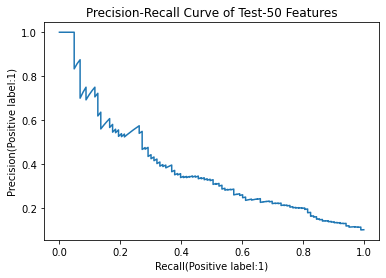

In [97]:
# Data to plot precision - recall curve
precision_reduced50, recall_reduced50, thresholds_reduced50 = precision_recall_curve(y_test, y_test_score_reduced50 )
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall_reduced50  = auc(recall_reduced50 , precision_reduced50 )
print('PR-AUC is {:.2f}'.format(auc_precision_recall_reduced50))

# plot PR curve
plt.plot(recall_reduced50, precision_reduced50)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test-50 Features')

#### II. XGBclassifier with parameters: better, the train metrics are not 1 anymore

#### 2.1 With all features

In [100]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
           
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1.0, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)

In [101]:
y_train_predpara= xgb_clf.predict(X_train)
y_test_predpara= xgb_clf.predict(X_test)

In [102]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, y_train_predpara))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, y_test_predpara))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3925
           1       0.96      0.92      0.94       403

    accuracy                           0.99      4328
   macro avg       0.98      0.96      0.97      4328
weighted avg       0.99      0.99      0.99      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       979
           1       1.00      0.05      0.09       103

    accuracy                           0.91      1082
   macro avg       0.95      0.52      0.52      1082
weighted avg       0.92      0.91      0.87      1082



In [103]:
y_train_probapara  = xgb_clf.predict_proba(X_train )
y_test_probapara = xgb_clf.predict_proba(X_test )

In [104]:
y_train_scorepara = y_train_probapara [:, 1]
y_test_scorepara  = y_test_probapara [:, 1]

PR-AUC is 0.98


<function matplotlib.pyplot.show(close=None, block=None)>

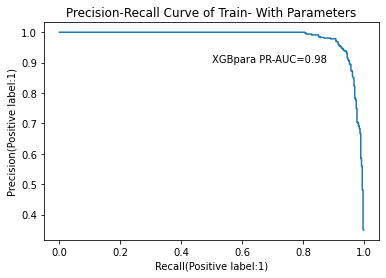

In [121]:
# Data to plot precision - recall curve
precision_para_train, recall_para_train, thresholds_para_train = precision_recall_curve(y_train, y_train_scorepara )
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall_trainpara  = auc(recall_para_train, precision_para_train )
print('PR-AUC is {:.2f}'.format(auc_precision_recall_trainpara))

# plot PR curve
plt.plot(recall_para_train, precision_para_train)
plt.text(0.5, 0.9, 'XGBpara PR-AUC={0:.2f}'.format(auc_precision_recall_trainpara))
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Train- With Parameters')
plt.show

PR-AUC is 0.59


<function matplotlib.pyplot.show(close=None, block=None)>

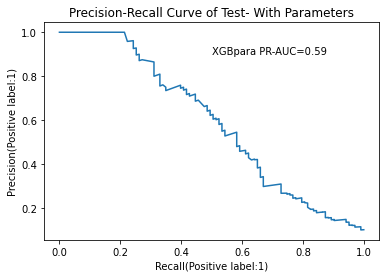

In [120]:
# Data to plot precision - recall curve
precision_para, recall_para, thresholds_para = precision_recall_curve(y_test, y_test_scorepara )
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall_para  = auc(recall_para, precision_para )
print('PR-AUC is {:.2f}'.format(auc_precision_recall_para))

# plot PR curve
plt.plot(recall_para, precision_para)
plt.text(0.5, 0.9, 'XGBpara PR-AUC={0:.2f}'.format(auc_precision_recall_para))
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test- With Parameters')
plt.show

#### 2.2 Top 50 features

In [133]:
xgb_steps_para50 = [('rescale', StandardScaler()), 
            ('xgbc', XGBClassifier(**params))]
xgb_model_para50 = Pipeline(xgb_steps_para50)
xgb_model_para50 = xgb_model_para50.fit(X_train_reduced50,y_train) 

In [125]:
y_train_pred_para50 = xgb_model_para50.predict(X_train_reduced50)
y_test_pred_para50 = xgb_model_para50.predict(X_test_reduced50)

In [126]:
print('---------------------Train Classification Report--------------------------------\n')
print(classification_report(y_train, y_train_pred_para50))
print('---------------------Test Classification Report--------------------------------\n')
print(classification_report(y_test, y_test_pred_para50))

---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3925
           1       0.96      0.93      0.95       403

    accuracy                           0.99      4328
   macro avg       0.98      0.96      0.97      4328
weighted avg       0.99      0.99      0.99      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       979
           1       1.00      0.08      0.14       103

    accuracy                           0.91      1082
   macro avg       0.96      0.54      0.55      1082
weighted avg       0.92      0.91      0.88      1082



In [127]:
y_train_proba_para50  = xgb_model_para50 .predict_proba(X_train_reduced50 )
y_test_proba_para50  = xgb_model_para50 .predict_proba(X_test_reduced50 )

In [128]:
y_train_score_para50 = y_train_proba_para50 [:, 1]
y_test_score_para50  = y_test_proba_para50 [:, 1]

PR-AUC is 0.98


<function matplotlib.pyplot.show(close=None, block=None)>

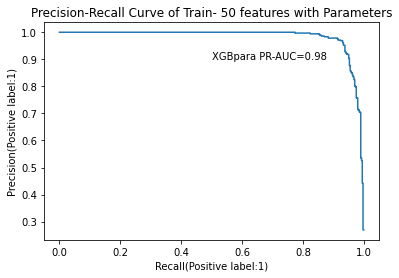

In [129]:
# Data to plot precision - recall curve
precision_para50_train, recall_para50_train, thresholds_para50_train = precision_recall_curve(y_train, y_train_score_para50 )
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall_trainpara50  = auc(recall_para50_train, precision_para50_train )
print('PR-AUC is {:.2f}'.format(auc_precision_recall_trainpara50))

# plot PR curve
plt.plot(recall_para50_train, precision_para50_train)
plt.text(0.5, 0.9, 'XGBpara PR-AUC={0:.2f}'.format(auc_precision_recall_trainpara50))
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Train- 50 features with Parameters')
plt.show

PR-AUC is 0.55


<function matplotlib.pyplot.show(close=None, block=None)>

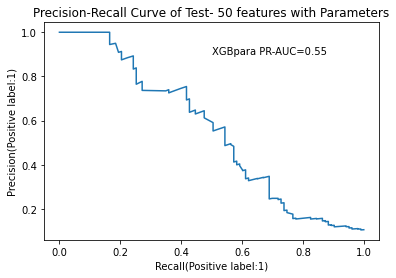

In [130]:
# Data to plot precision - recall curve
precision_para50_test, recall_para50_test, thresholds_para50_test = precision_recall_curve(y_test, y_test_score_para50 )
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall_testpara50  = auc(recall_para50_test, precision_para50_test )
print('PR-AUC is {:.2f}'.format(auc_precision_recall_testpara50))

# plot PR curve
plt.plot(recall_para50_test, precision_para50_test)
plt.text(0.5, 0.9, 'XGBpara PR-AUC={0:.2f}'.format(auc_precision_recall_testpara50))
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test- 50 features with Parameters')
plt.show

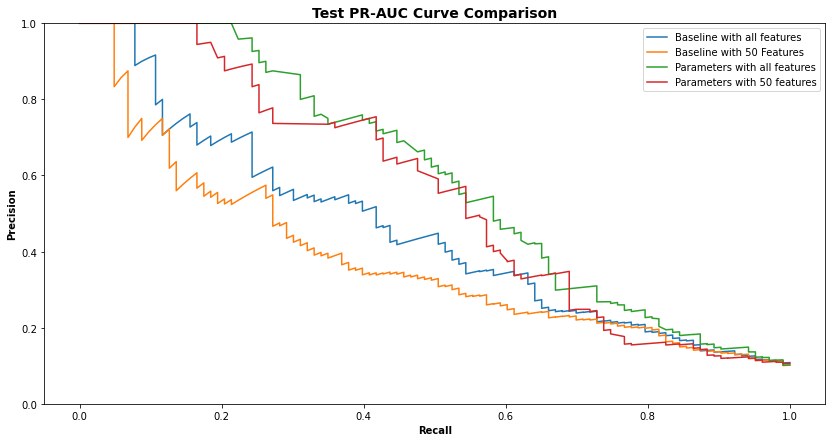

In [139]:
# Intitialize figure with two plots
fig, ax = plt.subplots()
# fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

ax.plot(recall, precision, label='Baseline with all features')
ax.plot(recall_reduced50, precision_reduced50, label='Baseline with 50 Features')
ax.plot(recall_para, precision_para, label='Parameters with all features')
ax.plot(recall_para50_test, precision_para50_test, label='Parameters with 50 features')


## Configure x and y axis
ax.set_xlabel('Recall', fontweight='bold')
ax.set_ylabel('Precision', fontweight='bold')
ax.set_ylim(0, 1)
## Create legend & title
ax.set_title('Test PR-AUC Curve Comparison', fontsize=14, fontweight='bold')
ax.legend(loc=1)

plt.show()



# Baseline 

#### III. Cross Validation

#### 3.1 With all features

In [147]:
# import XGBoost
import xgboost as xgb
X= X_train.append(X_test)
y=y_train.append(y_test)
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [154]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="aucpr", as_pandas=True, seed=123)
xgb_cv

,train-aucpr-mean,train-aucpr-std,test-aucpr-mean,test-aucpr-std
0,0.665032,0.012231,0.598840,0.019372
1,0.729347,0.025064,0.668597,0.037957
2,0.732718,0.027079,0.660591,0.035561
3,0.759772,0.008656,0.687154,0.030005
4,0.787544,0.002951,0.715077,0.030773
5,0.794253,0.009159,0.720033,0.034190
6,0.803509,0.009361,0.732844,0.029529
7,0.819015,0.012384,0.746042,0.037261
8,0.821485,0.013661,0.749765,0.039896
9,0.825892,0.012086,0.751474,0.032989


In [156]:
def draw_cv_pr_curve(classifier, xgb_cv, X, y, title='PR Curve'):
    """
    Draw a Cross Validated PR Curve.
    Keyword Args:
        classifier: Classifier Object
        cv: StratifiedKFold Object: (https://stats.stackexchange.com/questions/49540/understanding-stratified-cross-validation)
        X: Feature Pandas DataFrame
        y: Response Pandas Series
        
    Largely taken from: https://stackoverflow.com/questions/29656550/how-to-plot-pr-curve-over-10-folds-of-cross-validation-in-scikit-learn
    """
    y_real = []
    y_proba = []

    i = 0
    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        # Compute ROC curve and area the curve
        precision, recall, _ = precision_recall_curve(y.iloc[test], probas_[:, 1])
        
        # Plotting each individual PR Curve
        plt.plot(recall, precision, lw=1, alpha=0.3,
                 label='PR fold %d (AUC = %0.2f)' % (i, average_precision_score(y.iloc[test], probas_[:, 1])))
        
        y_real.append(y.iloc[test])
        y_proba.append(probas_[:, 1])

        i += 1
    
    y_real = np.concatenate(y_real)
    y_proba = np.concatenate(y_proba)
    
    precision, recall, _ = precision_recall_curve(y_real, y_proba)

    plt.plot(recall, precision, color='b',
             label=r'Precision-Recall (AUC = %0.2f)' % (average_precision_score(y_real, y_proba)),
             lw=2, alpha=.8)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

In [157]:
draw_cv_pr_curve(xgb_clf, xgb_cv, X, y, title='Cross Validated PR Curve')

AttributeError: 'function' object has no attribute 'split'

In [151]:
from sklearn.model_selection import cross_val_score, KFold


xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

# - cross validataion
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

Mean cross-validation score: 0.98
K-fold CV average score: 0.98
